In [236]:
str = """The patient is a 91-year-old Caucasian man with a past medical history of coronary artery disease, congestive heart failure, atrial fibrillation, hypertension, interstitial lung disease, and obstructive sleep apnea presented with a 2-week history of productive cough, fever, shortness of breath and generalized malaise. On presentation, vitals showed blood pressure of 77/35 mmHg, heart rate of 122 bpm, respiratory rate of 38 bpm, a temperature of 102 F, and oxygen saturation of 98% on 15 L of oxygen. The patient was diaphoretic, with decreased breath sounds in the right lung field, and on palpation of the abdomen, there was right upper quadrant fullness.\nInitial laboratory studies showed elevated white blood cells (WBC) 22.6 × 109/L with neutrophilia, bicarbonate 21 mmol/L, lactic acid 6.5 mmol/L, anion gap 17, ALT 71 IU/L, AST 69 IU/L, and ALP 450 IU/L. ECG showed atrial fibrillation with a rapid ventricular response. CXR showed acute right pleural effusion (). The patient was intubated for respiratory failure. He was also started on antibiotics (piperacillin-tazobactam and azithromycin) and intravenous normal saline with no improvement in blood pressure. The patient was then started on intravenous vasopressor support with norepinephrine and vasopressin and admitted to the intensive care unit (ICU).\nDue to the right upper quadrant fullness, elevated liver enzymes and fever, an abdominal ultrasound was performed, which showed an acute complex heterogeneous hypoechoic 8 × 7 × 6 cm mass-like lesion in the right hepatic lobe ().\nTo better characterize the lesion, a CT abdomen was done. The CT showed a complex low-density right hepatic lobe subcapsular lesion measuring 13 × 8 × 7 cm, directly abutting the right anterior diaphragm, along with diffuse gross gallbladder wall thickening with cholelithiasis and a moderate right pleural effusion ().\nThe patient underwent chest tube placement with the removal of 1600 cc of cloudy light-brown-colored fluid. Pleural fluid analysis was consistent with empyema, with WBC of 70,800 cells/mcL (61% neutrophils), glucose less than 10 mg/dL, LDH of 4821 IU/L, pH of 7.0, protein of 3.6 gm/dL, and Gram stain showing Gram-positive cocci in chains. Cytology was negative for malignant cells but showed severe acute inflammation and rare mesothelial cells. The blood culture on admission grew beta-hemolytic streptococci. The pleural fluid culture grew Streptococcus anginosus. On day two of hospitalization, the patient was scheduled for CT percutaneous drainage of liver abscess. However, the CT revealed a significant decrease in the size of the right subdiaphragmatic perihepatic collection to 1.5 cm in greatest thickness ().\nDue to the improvement of the hepatic collection, the CT-guided drainage of the collection was not performed. Following the persistence of pleural effusion and decreased effluent from the chest tube, an intrapleural thrombolytic was instilled via chest tube with the removal of 1.5 L exudative fluid. Repeat CXR showed improvement in the right pleural effusion (), and the patient was successfully extubated on day three of hospitalization.\nHis hospital course was subsequently complicated by new onset and worsening respiratory distress on day eight of hospitalization requiring re-intubation. Repeat CT chest showed diffuse narrowing of the left mainstem bronchus, occlusion of right posterior segmental bronchi with atelectasis, complete collapse of the left lower lobe due to occlusion of left lower lobe central bronchi with trace right pleural effusion ().\nEmergent flexible fiberoptic bronchoscopy was done and showed copious thick mucopurulent secretions that were suctioned to clear. The bronchoalveolar lavage grew Candida albicans, which was not thought to be a pathogen. After two weeks of hospitalization and the inability to wean the patient from the ventilator, the patient was terminally extubated, and care was focused on comfort."""

In [237]:
import random
import re

l = []
l.append(str)
osl_shuffled = l

import re

# Assuming lis contains the text data
dataset = osl_shuffled
final_list_of_sentences = []

# Compile the regex patterns once for efficiency
sentence_splitter = re.compile(r'\.\s*')
word_tokenizer = re.compile(r'\b[\w-]+\b')

# Process each text in the dataset
for text in dataset:
    # Split text into sentences and remove empty sentences
    sentences = [sentence.strip() + '.' for sentence in sentence_splitter.split(text) if sentence.strip()]

    # Tokenize, lowercase, and clean each sentence
    tokenized_sentences = [' '.join(word_tokenizer.findall(sentence.lower())) for sentence in sentences]

    # Append the cleaned sentences to the final list
    final_list_of_sentences.append(tokenized_sentences)



for i in range(len(final_list_of_sentences)):
    if not final_list_of_sentences[i]:
        print('Empty')
    final_list_of_sentences[i] = [sentence for sentence in final_list_of_sentences[i] if sentence]

final_list_of_sentences

[['the patient is a 91-year-old caucasian man with a past medical history of coronary artery disease congestive heart failure atrial fibrillation hypertension interstitial lung disease and obstructive sleep apnea presented with a 2-week history of productive cough fever shortness of breath and generalized malaise',
  'on presentation vitals showed blood pressure of 77 35 mmhg heart rate of 122 bpm respiratory rate of 38 bpm a temperature of 102 f and oxygen saturation of 98 on 15 l of oxygen',
  'the patient was diaphoretic with decreased breath sounds in the right lung field and on palpation of the abdomen there was right upper quadrant fullness',
  'initial laboratory studies showed elevated white blood cells wbc 22',
  '6 109 l with neutrophilia bicarbonate 21 mmol l lactic acid 6',
  '5 mmol l anion gap 17 alt 71 iu l ast 69 iu l and alp 450 iu l',
  'ecg showed atrial fibrillation with a rapid ventricular response',
  'cxr showed acute right pleural effusion',
  'the patient was i

In [238]:
import torch
import torch.nn as nn
import re
from torchcrf import CRF
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertModel, BertConfig
from download_utils import download_model_if_needed

# Define BiLSTM and MOD classes
class BiLSTM(nn.Module):
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.input_size = 768
        self.hidden_size = 256
        self.num_layers = 2
        self.dropout = 0.3
        self.bilstm = nn.LSTM(input_size=self.input_size, hidden_size=128,
                            num_layers=self.num_layers, batch_first=True,
                            dropout=self.dropout, bidirectional=True)

    def forward(self, embeddings):
        lstm_out, _ = self.bilstm(embeddings)
        return lstm_out

class MOD(nn.Module):
    def __init__(self, input_size, num_labels):
        super(MOD, self).__init__()
        self.bilstm = BiLSTM()
        self.linear = nn.Linear(256, num_labels)
        self.crf = CRF(num_labels)

    def forward(self, x):
        lstm_output = self.bilstm(x)
        embeddings = self.linear(lstm_output)
        return embeddings

# Load BioBERT tokenizer and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [239]:

import os

# Get the current file's directory (Utils directory)
current_dir = os.getcwd()  # Use os.getcwd() to get the current working directory

# Construct paths to the model files
config_path = os.path.join(current_dir, "config.json")
vocab_path = os.path.join(current_dir, "vocab.txt")
model_path = os.path.join(current_dir, "pytorch_model.bin")

# Add the Google Drive URL for your model
GDRIVE_URL = "https://drive.google.com/uc?id=1q43z-Eo_ZE41tpJOhOIbd_WPS0ufDz6j"  

# Download the model if it doesn't exist
model_path = download_model_if_needed(model_path, GDRIVE_URL)
from torch.ao.quantization import quantize_dynamic
config = BertConfig.from_pretrained(config_path)
tokenizer = BertTokenizer.from_pretrained(vocab_path)
biobert_model = BertModel.from_pretrained(model_path, config=config, local_files_only=True)
# biobert_model = quantize_dynamic(
#     biobert_model, {torch.nn.Linear}, dtype=torch.qint8
# )
# Load the trained model
model = MOD(768, 6).to(device)  # Ensure model is on the same device
import os


# Get the current file's directory (Utils directory)
current_dir =os.getcwd()  # Use os.getcwd() to get the current working directory

# Construct path to the model file
model_path = os.path.join(current_dir, "best_model.pth")
# model = quantize_dynamic(
#     model, {torch.nn.Linear}, dtype=torch.qint8
# )
model.load_state_dict(torch.load(model_path, map_location=device))
##

model.eval()

# Initialize lists for storing results
all_symptoms_ALL = []
symptoms_wout_duration_ALL = []
symptom_with_organ_ALL = []
new_dict_ALL = []

organs_list = []
# Assuming final_list_of_sentences is already defined
for i in range(len(final_list_of_sentences)):    
    sentences = final_list_of_sentences[i]
    tsl_tokenized = []

    for sentence in sentences:
        tokens = re.findall(r'\b[\w-]+\b', sentence.lower())
        tsl_tokenized.append(tokens)

    vocab_test = []
    for sentence in tsl_tokenized:
        for token in sentence:
            if token not in vocab_test:
                vocab_test.append(token)

    word_embeddings = []
    for word in vocab_test:
        tokens = tokenizer(word, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = biobert_model(**tokens)
        embedding = outputs.last_hidden_state[0][0]
        word_embeddings.append(embedding)

    word_embeddings_test = torch.stack(word_embeddings).to(device)
    sentence_embeddings_test = []
    each_sentence = []

    for k in range(len(tsl_tokenized)):
        each_word_embeddings_test = []
        for token in tsl_tokenized[k]:
            word_embedding_tensor_test = word_embeddings_test[vocab_test.index(token)]
            each_word_embeddings_test.append(word_embedding_tensor_test)
        sentence_embeddings_test.extend(each_word_embeddings_test)
        each_sentence.append(each_word_embeddings_test)

    pred = []
    for j, sentence in enumerate(each_sentence):
        if len(sentence) == 0:
            continue
        with torch.no_grad():
            print(i, j)
            # Stack the sentence tensors and move them to the device
            sentence_tensor = torch.stack(sentence).to(device).view(1, -1, 768)
            output = model(sentence_tensor)
            prediction = model.crf.decode(output)
            pred.append(prediction)

    # Create lists for different labels
    lis_1 = []
    lis_3 = []
    lis_4 = []
    lis_5 = []

    for i in range(len(pred)):
        l1 = {}
        l3 = {}
        l4 = {}
        l5 = {}
        prediction = pred[i]
        s = ''
        for k in range(len(prediction)):
            if prediction[k][0] != 0:
                s += tsl_tokenized[i][k] + ' '
            elif k != 0 and prediction[k][0] == 0:
                t = prediction[k-1][0]
                if t != 0:
                    if t == 1:
                        l1[s.strip()] = k
                    elif t == 2:
                        l1[s.strip()] = k
                    elif t == 3:
                        l3[s.strip()] = k
                    elif t == 4:
                        l4[s.strip()] = k
                    elif t == 5:
                        l5[s.strip()] = k
            
                    s = ''

                #store the organs in a set??
                organs_list.append(list(l5.keys()))
        if prediction[-1][0] != 0:
            t = prediction[-1][0]
            if t == 1:
                l1[s.strip()] = len(prediction)
            elif t == 2:
                l1[s.strip()] = len(prediction)
            elif t == 3:
                l3[s.strip()] = len(prediction)
            elif t == 4:
                l4[s.strip()] = len(prediction)
            elif t == 5:
                l5[s.strip()] = len(prediction)

        lis_1.append(l1)
        lis_3.append(l3)
        lis_4.append(l4)
        lis_5.append(l5)

    symptoms_wout_duration = []
    for l1 in lis_1:
        if l1:
            for key in l1.keys():
                symptoms_wout_duration.append(key)

    new_dict = {}
    for i in range(len(lis_3)):
        if not lis_3[i]:
            #new_dict_ALL.append(new_dict)
            continue
        for key_3, value_3 in lis_3[i].items():
            closest_key = None
            minimum_difference = float('inf')
            for key_1, value_1 in lis_1[i].items():
                difference = abs(value_3 - value_1)
                if difference < minimum_difference:
                    minimum_difference = difference
                    closest_key = key_1
            new_dict[key_3] = closest_key

    all_symptoms_ALL.append(symptoms_wout_duration)
    symptoms_wout_duration_ALL.append(symptoms_wout_duration)
    new_dict_ALL.append(new_dict)



all_symptoms_ALL = [list(set(lst)) for lst in all_symptoms_ALL]

/var/folders/_v/dz3m_2kn1pjgzx82_dbrsy680000gn/T/ipykernel_71480/2089725556.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path,

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32


In [240]:


for i in symptoms_wout_duration_ALL:
    if 'headache' in i:
        print(True)


hashset = set()
for i in organs_list:
    if i:
        for j in i:
            hashset.add(j)



In [241]:
import string
import re

# Create a set of common words to remove
common_words = set(['a', 'and' 'an', 'the', 'is', 'are', 'was', 'were', 'of', 'in', 'to', 'for', 'and', 'or', 'but', 'with', 'on', 'at', 'as', 'by', 'for', 'with', 'as', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'as', 'until', 'while', 'as', 'until', 'while'])

# Function to clean a single word
def clean_word(word):
    # Remove punctuation and convert to lowercase
    word = word.lower().translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    word = re.sub(r'\d+', '', word)
    return word.strip()

# Clean the hashset
cleaned_hashset = set()
for item in hashset:
    # Split the item into words
    words = item.split()
    # Clean each word and keep only non-common words
    cleaned_words = [clean_word(word) for word in words if clean_word(word) and clean_word(word) not in common_words]
    # Join the cleaned words back together
    cleaned_item = ' '.join(cleaned_words)
    if cleaned_item:  # Only add non-empty items
        cleaned_hashset.add(cleaned_item)



hashset = cleaned_hashset

In [242]:


#CHECK WHETHER A SYMPTOM IS PRESENT IN THE GIVEN SENTENCE
#IF YES: LOOK FOR ORGANS IN THE SENTENCE AND IN THE (i + 1) AND (i - 1) SENTENCES
#JUST EXTRACT THE PAIRS FOR N0W
symp_to_organ_tentative = []
for i in range(len(final_list_of_sentences)):   #EACH CASE
    for t in range(len(final_list_of_sentences[i])):    #SENTENCE IN EACH CASE

        #iterate through the symptoms_wout_duration_ALL list and check for it in i:
        for j in range(len(symptoms_wout_duration_ALL)):
            symptoms_in_case = symptoms_wout_duration_ALL[j]
            for k in range(len(symptoms_in_case)):
                #CHECK FOR THE SYMPTOM IN i
                symptom = symptoms_in_case[k]
                if symptom in final_list_of_sentences[i][t]:
                    #SEARCH FOR AN ORGAN in (t, t + 1 and t - 1) AND JUST EXTRACT THE MAPPINGS
                    for q in hashset:
                        if q in final_list_of_sentences[i][t]:
                            #MAKE THE SYMPTOM - ORGAN PAIRS:
                            temp = []
                            temp.append(symptom)
                            temp.append(q)
                            symp_to_organ_tentative.append(temp)

                if t- 1 >= 0 and symptom in final_list_of_sentences[i][t - 1] :
                    #SEARCH FOR AN ORGAN in (t, t + 1 and t - 1) AND JUST EXTRACT THE MAPPINGS
                    for q in hashset:
                        if q in final_list_of_sentences[i][t - 1]:
                            #MAKE THE SYMPTOM - ORGAN PAIRS:
                            temp = []
                            temp.append(symptom)
                            temp.append(q)

                if t + 1 < len(final_list_of_sentences[i]) and symptom in final_list_of_sentences[i][t + 1] :
                    #SEARCH FOR AN ORGAN in (t, t + 1 and t - 1) AND JUST EXTRACT THE MAPPINGS
                    for q in hashset:
                        if q in final_list_of_sentences[i][t + 1]:
                            #MAKE THE SYMPTOM - ORGAN PAIRS:
                            temp = []
                            temp.append(symptom)
                            temp.append(q)


s = []
for i in symp_to_organ_tentative:
    if i not in s:
        s.append(i)
print(s)
symp_to_organ_tentative = s

l = []
for i in range(len(new_dict_ALL) - 1):
    if new_dict_ALL[i] != new_dict_ALL[i + 1]:
        l.append(new_dict_ALL[i])

l.append(new_dict_ALL[len(new_dict_ALL) - 1])

symptom_with_duration_ALL = l
symptom_with_duration_ALL

[['diaphoretic', 'right lung field'], ['diaphoretic', 'abdomen'], ['decreased', 'right lung field'], ['decreased', 'abdomen'], ['right upper quadrant fullness', 'right lung field'], ['right upper quadrant fullness', 'abdomen'], ['l', 'right lung field'], ['l', 'abdomen'], ['right upper quadrant fullness', 'abdominal'], ['right upper quadrant fullness', 'liver'], ['the right upper quadrant fullness', 'abdominal'], ['the right upper quadrant fullness', 'liver'], ['fever', 'abdominal'], ['fever', 'liver'], ['lesion', 'abdominal'], ['lesion', 'liver'], ['l', 'abdominal'], ['l', 'liver'], ['to', 'abdominal'], ['to', 'liver'], ['lesion', 'abdomen'], ['to', 'abdomen'], ['right pleural', 'right anterior diaphragm'], ['lesion', 'right anterior diaphragm'], ['right hepatic lobe subcapsular lesion', 'right anterior diaphragm'], ['gallbladder wall thickening', 'right anterior diaphragm'], ['cholelithiasis', 'right anterior diaphragm'], ['pleural', 'right anterior diaphragm'], ['l', 'right anterior

[{'7': 'pleural', '1': None, 'two weeks': 'to'}]

In [243]:


time_units = ['seconds', 'minutes', 'hours', 'days', 'months', 'years', 'decades']

def replace_keys(data, time_units):
    new_data = []
    for item in data:
        new_item = {}
        for key, value in item.items():
            matched_word = next((unit for unit in time_units if unit in key), None)
            if matched_word and value is not None:
                new_item[matched_word] = value
        new_data.append(new_item)
    return new_data

updated_data = replace_keys(symptom_with_duration_ALL, time_units)
print(updated_data)

symptom_with_duration_ALL = updated_data
symptom_with_duration_ALL

[{}]


[{}]

In [244]:


symptom_duration_map = {}
for duration_dict in symptom_with_duration_ALL:
    for duration, symptom in duration_dict.items():
        symptom_duration_map[symptom] = duration

# Combine the lists to create the final output
combined_list = []
for symptom in symptoms_wout_duration_ALL[0]:
    # Get the duration for the current symptom, or 'nil duration' if not found
    duration = 'nil duration'
    for key in symptom_duration_map:
        if key in symptom:
            duration = symptom_duration_map[key]
            break

    # Find all organs associated with the symptom, or 'nil organ' if no association is found
    found_organ = False
    for symp, organ in symp_to_organ_tentative:
        if symptom == symp:
            combined_list.append([symptom, duration, organ])
            found_organ = True

    # If no organ was found for the symptom, add 'nil organ'
    if not found_organ:
        combined_list.append([symptom, duration, 'nil organ'])


In [245]:
combined_list

[['hypertension', 'nil duration', 'nil organ'],
 ['sleep apnea', 'nil duration', 'nil organ'],
 ['cough fever shortness of breath', 'nil duration', 'nil organ'],
 ['malaise', 'nil duration', 'nil organ'],
 ['diaphoretic', 'nil duration', 'right lung field'],
 ['diaphoretic', 'nil duration', 'abdomen'],
 ['decreased', 'nil duration', 'right lung field'],
 ['decreased', 'nil duration', 'abdomen'],
 ['decreased', 'nil duration', 'chest'],
 ['right upper quadrant fullness', 'nil duration', 'right lung field'],
 ['right upper quadrant fullness', 'nil duration', 'abdomen'],
 ['right upper quadrant fullness', 'nil duration', 'abdominal'],
 ['right upper quadrant fullness', 'nil duration', 'liver'],
 ['ventricular response', 'nil duration', 'nil organ'],
 ['right pleural', 'nil duration', 'right anterior diaphragm'],
 ['right pleural', 'nil duration', 'chest'],
 ['right pleural', 'nil duration', 'left lower lobe'],
 ['right pleural', 'nil duration', 'right posterior segmental bronchi'],
 ['rig

In [246]:


duration_mapping = {
    'seconds': 2,
    'minutes': 3,
    'hours': 4,
    'days': 5,
    'months': 6,
    'years': 7,
    'decades': 8,
    'nil duration': 1
}

# Update the second element in each sublist
for lis in combined_list:
    lis[1] = duration_mapping[lis[1]]

# Convert each sublist to a tuple
for i in range(len(combined_list)):
    combined_list[i] = tuple(combined_list[i])


combined_list


[('hypertension', 1, 'nil organ'),
 ('sleep apnea', 1, 'nil organ'),
 ('cough fever shortness of breath', 1, 'nil organ'),
 ('malaise', 1, 'nil organ'),
 ('diaphoretic', 1, 'right lung field'),
 ('diaphoretic', 1, 'abdomen'),
 ('decreased', 1, 'right lung field'),
 ('decreased', 1, 'abdomen'),
 ('decreased', 1, 'chest'),
 ('right upper quadrant fullness', 1, 'right lung field'),
 ('right upper quadrant fullness', 1, 'abdomen'),
 ('right upper quadrant fullness', 1, 'abdominal'),
 ('right upper quadrant fullness', 1, 'liver'),
 ('ventricular response', 1, 'nil organ'),
 ('right pleural', 1, 'right anterior diaphragm'),
 ('right pleural', 1, 'chest'),
 ('right pleural', 1, 'left lower lobe'),
 ('right pleural', 1, 'right posterior segmental bronchi'),
 ('right pleural', 1, 'left lower lobe central bronchi'),
 ('the right upper quadrant fullness', 1, 'abdominal'),
 ('the right upper quadrant fullness', 1, 'liver'),
 ('fever', 1, 'abdominal'),
 ('fever', 1, 'liver'),
 ('lesion', 1, 'abdomi

In [247]:
import pandas as pd
import os

# Get the current file's directory (Utils directory)
current_dir = os.getcwd()
# Construct the path to the CSV file
csv_path = os.path.join(current_dir, '12koutput.csv')

# Read the CSV file
y = pd.read_csv(csv_path)

print("Columns in the DataFrame:", y.columns)

# Convert `organ` and `symptom` columns to lowercase
y['organ'] = y['organ'].str.lower()
y['symptom'] = y['symptom'].str.lower()

# Sort the dataset by `organ` and `symptom`
z = y.sort_values(by=['organ', 'symptom']).reset_index(drop=True)

# Group by `symptom` and `organ` to calculate the count
final_ds = (
    z.groupby(['symptom', 'organ'])
    .size()
    .reset_index(name='cnt')  # Add a `cnt` column for the count
)

# Sort by `cnt` in descending order
f = final_ds.sort_values(by='cnt', ascending=False).reset_index(drop=True)

# Remove rows with `unspecified` organ or invalid symptom values
fs = f[
    (f['organ'] != 'unspecified') &
    (f['symptom'] != 'organ') &
    (f['symptom'] != 'symptom')
].reset_index(drop=True)

# Display the final DataFrame
# print(fs)

# def rec_filter(input_string, filtered_data):
    # Use fHALF to parse the input string into a DataFrame
symptoms_list = combined_list
symptoms_df = pd.DataFrame(symptoms_list, columns=['symptom', 'duration', 'organ'])
symptoms_df['duration'] = symptoms_df['duration'].astype(int)  # Convert duration to integer

# Perform INNER JOIN on fs and symptoms_df based on organ and symptom
our_vals = pd.merge(fs, symptoms_df, on=['organ', 'symptom'], how='inner')

# Group by organ to calculate the sum of cnt
organ_group = our_vals.groupby('organ').agg(summation=('cnt', 'sum')).reset_index()

# Calculate the denominator for p of organs (sum of all summations)
denominator_for_p_of_organs = organ_group['summation'].sum()

# Merge our_vals with organ_group to calculate naive_bayes_probability_factor
our_vals = pd.merge(our_vals, organ_group, on='organ', how='left')
our_vals['naive_bayes_probability_factor'] = our_vals['cnt'] / our_vals['summation']

# Sort our_vals by naive_bayes_probability_factor in descending order
our_vals_sorted = our_vals.sort_values(by='naive_bayes_probability_factor', ascending=False)
print(our_vals_sorted[['symptom', 'organ', 'naive_bayes_probability_factor']])

# Group by symptom and select the row with the maximum naive_bayes_probability_factor
final_group = our_vals_sorted.loc[
    our_vals_sorted.groupby('symptom')['naive_bayes_probability_factor'].idxmax()
].reset_index(drop=True)

# Select relevant columns for the final DataFrame
rec_filter_df = final_group[['symptom', 'duration', 'organ']]

# Create a DataFrame for "nil organ" symptoms
temp_organs = pd.DataFrame({'symptom': ['nil organ'], 'organ': ['nil organ']})

# Perform FULL OUTER JOIN between rec_filter_df and temp_organs
final_result = pd.merge(
    rec_filter_df, temp_organs, on='symptom', how='outer', suffixes=('', '_temp')
).fillna({'duration': 0, 'organ': 'nil organ'})

# Convert the DataFrame to a list of tuples and return
combined_list = list(final_result[['symptom', 'duration', 'organ']].itertuples(index=False, name=None))

# # Example Usage
# fs_data = {
#     'symptom': ['symp1', 'symp2', 'symp3', 'symp1'],
#     'organ': ['org1', 'org2', 'org3', 'org1'],
#     'cnt': [10, 20, 30, 15]
# }
# fs = pd.DataFrame(fs_data)

combined_list

Columns in the DataFrame: Index(['symptom', 'organ'], dtype='object')
                          symptom      organ  naive_bayes_probability_factor
12                          fever  abdominal                        1.000000
0                          lesion      liver                        0.436242
1                          lesion      liver                        0.436242
2                          lesion    abdomen                        0.434783
3                          lesion    abdomen                        0.434783
8                           fluid      chest                        0.428571
9                           fluid      chest                        0.428571
11                        pleural      chest                        0.142857
7   right upper quadrant fullness    abdomen                        0.130435
4                   liver abscess      liver                        0.060403
5                               l      liver                        0.026846
6     

[('fever', 1.0, 'abdominal'),
 ('fluid', 1.0, 'chest'),
 ('l', 1.0, 'liver'),
 ('lesion', 1.0, 'liver'),
 ('liver abscess', 1.0, 'liver'),
 ('nil organ', 0.0, 'nil organ'),
 ('pleural', 1.0, 'chest'),
 ('right upper quadrant fullness', 1.0, 'abdomen')]

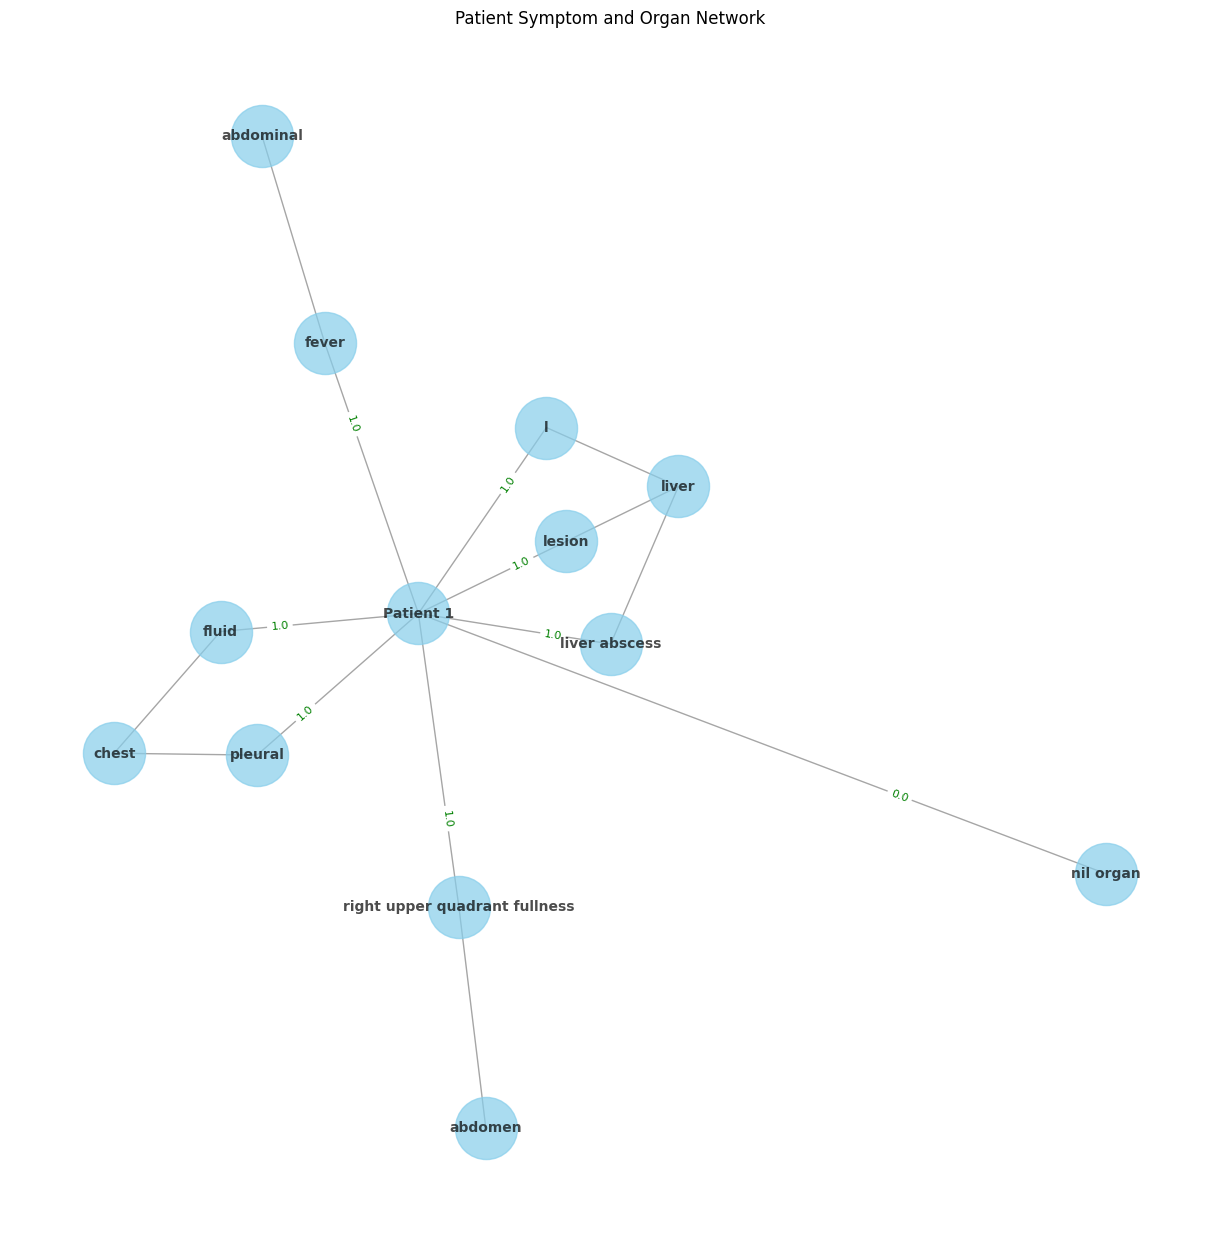

In [248]:

import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph for the patient
G = nx.Graph()

# Add a central node for the patient
patient_node = 'Patient 1'
G.add_node(patient_node, label='Patient')

# Add nodes for symptoms and organs, and connect them to the patient node
for symptom, duration, organ in combined_list:
    # Add symptom node and connect to patient
    G.add_node(symptom, label='Symptom')
    G.add_edge(patient_node, symptom)

    # Add organ node if it is specified and connect to the symptom
    if organ != 'nil organ':
        G.add_node(organ, label='Organ')
        G.add_edge(symptom, organ)

    # Optional: Set edge weights based on symptom durations (if applicable)
    if duration != 'nil duration':
        G[patient_node][symptom]['weight'] = duration

# Function to plot the graph
def plot_graph(G):
    pos = nx.spring_layout(G, k=0.5, scale=2)  # Adjust k and scale for better spacing
    plt.figure(figsize=(12, 12))  # Adjust figure size for better display
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', alpha=0.7, edge_color='gray')

    # Draw edge labels and weights
    weights = nx.get_edge_attributes(G, 'weight')
    if weights:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='green', font_size=8, label_pos=0.3)

    plt.title('Patient Symptom and Organ Network')
    plt.show()

# Plot the graph
plot_graph(G)


In [249]:


from transformers import BertTokenizer, BertModel, BertConfig
import torch
import torch.nn as nn
import re
from torchcrf import CRF
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertModel, BertConfig
import os
from download_utils import download_model_if_needed

# Get the current file's directory (Utils directory)
current_dir = os.getcwd()

# Construct paths to the model files
config_path = os.path.join(current_dir, "config.json")
vocab_path = os.path.join(current_dir, "vocab.txt")
model_path = os.path.join(current_dir, "pytorch_model.bin")

# Add the Google Drive URL for your model
GDRIVE_URL = "https://drive.google.com/uc?id=1q43z-Eo_ZE41tpJOhOIbd_WPS0ufDz6j"

# Download the model if it doesn't exist
model_path = download_model_if_needed(model_path, GDRIVE_URL)

config = BertConfig.from_pretrained(config_path)
tokenizer = BertTokenizer.from_pretrained(vocab_path)
biobert_model = BertModel.from_pretrained(model_path, config=config, local_files_only=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:1925: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [250]:


feature_matrices = []


matrix = [None] * len(G.nodes())  # Initialize a list to store embeddings in the correct order

edge_list = list(G.edges())
unique_nodes = sorted(set(G.nodes()))  # Ensure all nodes are included and sorted

node_mapping = {node: i for i, node in enumerate(unique_nodes)}  # Mapping nodes to indices

for node in G.nodes():
    if node not in node_mapping:
        print(f"Node '{node}' not found in node_mapping.")
        continue

    print(node)
    text = node  # Text to be tokenized
    # inputs = tokenizer(text, return_tensors='pt').to(device)

    # with torch.no_grad():
    #     outputs = biobert_model(**inputs)
    #     embeddings = outputs.last_hidden_state

    # Averaging the embeddings
    #averaged_matrix = embeddings[0].mean(dim=0).view(1, -1)

    # Place the embedding in the correct row based on the node_mapping

    inputs = tokenizer(text, return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = biobert_model(**inputs)
        embeddings = outputs.last_hidden_state

    # Averaging the embeddings
    averaged_matrix = embeddings[0].mean(dim=0).view(1, -1)
    matrix[node_mapping[node]] = averaged_matrix


# Remove None entries (if any) and convert the list to a tensor
matrix = torch.cat([m for m in matrix if m is not None], dim=0)  # (num_nodes, hidden_size)
feature_matrices.append(matrix)

print(feature_matrices)


Patient 1
fever
abdominal
fluid
chest
l
liver
lesion
liver abscess
nil organ
pleural
right upper quadrant fullness
abdomen
[tensor([[ 0.3019, -0.0280, -0.2518,  ..., -0.0707,  0.2164, -0.1463],
        [ 0.1128, -0.0544, -0.4386,  ..., -0.4546,  0.4605, -0.0692],
        [ 0.2970, -0.1672, -0.2915,  ..., -0.5004,  0.4915, -0.0402],
        ...,
        [ 0.3272, -0.1682, -0.2266,  ..., -0.0516, -0.0899,  0.1724],
        [-0.0832, -0.5081, -0.0016,  ..., -0.0757,  0.0351,  0.0815],
        [-0.0870,  0.0386,  0.0251,  ..., -0.0275,  0.3598, -0.1101]])]


In [251]:

main_edge_list = []
lis = []


matrix = []
print(G.nodes)

edge_list = list(G.edges())
unique_nodes = sorted(set(node for edge in edge_list for node in edge))  # Sort the unique nodes

# Create a mapping from node labels to integers in a sorted order
node_mapping = {node: i for i, node in enumerate(unique_nodes)}

# Convert edge list to numeric representation
numeric_edge_list = [[node_mapping[u], node_mapping[v]] for u, v in edge_list]

# Create tensor and move to the appropriate device
edge_tensor = torch.tensor(numeric_edge_list, dtype=torch.long).to(device)
lis.append(edge_tensor)

# Store the edge list in main_edge_list
main_edge_list.append(edge_list)



['Patient 1', 'fever', 'abdominal', 'fluid', 'chest', 'l', 'liver', 'lesion', 'liver abscess', 'nil organ', 'pleural', 'right upper quadrant fullness', 'abdomen']


In [252]:




import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, SortAggregation
from torch_geometric.data import Data
import torch.optim as optim
import numpy as np
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class GCN_SortPool_CNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, k):
        super(GCN_SortPool_CNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        #self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.sort_pool = SortAggregation(k=k) #prioritizing nodes (dk what k is)
        self.cnn1d = nn.Conv1d(in_channels=hidden_channels, out_channels=32, kernel_size=2)
    
        # Calculate the correct input size for the fully connected layer
        cnn_output_size = 32 * (k - 1)  # Because kernel_size=2 reduces length by 1
        self.fc = nn.Linear(cnn_output_size, out_channels)
    
    def forward(self, x, edge_index):
        # GCN Layers
        x = F.relu(self.conv1(x, edge_index))
        #x = F.relu(self.conv2(x, edge_index))
    
        # SortPooling
        x = self.sort_pool(x, torch.zeros(x.size(0), dtype=torch.long, device=x.device))  # Create a dummy batch tensor
    
        # Reshape for 1D CNN
        x = x.view(x.size(0), -1, self.sort_pool.k)  # Reshape to (batch_size, hidden_channels, k)
    
        # 1D CNN
        x = F.relu(self.cnn1d(x))
        x = x.view(x.size(0), -1)  # Flatten
    
        # Fully Connected + Sigmoid
        x = self.fc(x)
        x = torch.sigmoid(x)  # Apply sigmoid activation
        return x

# Load the model
model = GCN_SortPool_CNN(in_channels=768, hidden_channels=32, out_channels=1, k=14).to(device)

import os

# Get the current file's directory (Utils directory)
current_dir = os.getcwd()

# Construct path to the model file
model_path = os.path.join(current_dir, "gcn_sortpool_cnn.pth")
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()
pred_1 = [0]
pred_1_shuffled = [0]
# Create a list of Data objects for the test data
graphs = [Data(x=feature_matrices[i].to(device), edge_index=lis[i].to(device)) for i in range(len(feature_matrices))]
#print(len(pred_1))
# Perform inference
with torch.no_grad():
    predictions = []
    targets = []
    c=0
    for i, graph in enumerate(graphs):
        c+=1
        if c>44:
            break
        output = model(graph.x, graph.edge_index.view(2, -1))
        predicted = (output > 0.5).float()  # Convert probabilities to binary predictions
        predictions.append(predicted.cpu().numpy())  # Move output to CPU and convert to numpy array
        targets.append(pred_1_shuffled[i])  # Collect the targets

# Convert lists to numpy arrays for easy comparison
predictions = np.array(predictions).flatten()  # Flatten to match target shape
targets = np.array(targets).flatten()  # Flatten to match prediction shape

# Calculate number of correct predictions
correct_predictions = np.sum(predictions == targets)
total_predictions = len(targets)
accuracy = correct_predictions / total_predictions

# Output number of correct predictions, accuracy, and predictions
# print(f"Number of correct predictions: {correct_predictions}")
# print(f"Accuracy: {accuracy:.4f}")

q = -1
for i, (pred, target) in enumerate(zip(predictions, targets)):
    # print(f"Graph {i} - Prediction: {pred}, Target: {target}")
    q = pred

s = ""
if q == 0:
    s = "MRI NOT REQUIRED"
elif q == 1:
    s = "MRI NEEDED NOW !!!"
else:
    s = "PREDICTION_NEEDED"


[('', s)]

/var/folders/_v/dz3m_2kn1pjgzx82_dbrsy680000gn/T/ipykernel_71480/2294230845.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path,

[('', 'MRI NEEDED NOW !!!')]